# Argo data visualization

## Global settings

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# ALL_DATASET_PATH = '../data/time_series_data/Atlantic_2019_03/normalized'
ALL_DATASET_PATH = '../data/time_series_data/Atlantic_2019_03'
TRAIN_DATASET_PATH = '../data/randomsplit/train/'
# float_number = '3901684'
# float_number = '4903217'
# float_number = '4902919'

float_numbers = [
    '4903052',
    '4903054',
    '4903058',
    '4903215',
    '4903217',
    '4903218',
    '4903220'
]

float_number = '4903220'
split_method = 'random'



In [3]:
def plot_anomalies(data, x_axis, y_axis, label_name, ax):
    data_normal = data.loc[data[label_name]==0]
    data_abnormal = data.loc[data[label_name]==1]
    # data_normal.plot.scatter(x=x_axis, y=y_axis, s=4, c='green', figsize=(16, 9), alpha=0.5, ax=ax, label='Normal')
    data_abnormal.plot.scatter(x=x_axis, y=y_axis, s=4, c='red', alpha=0.5, ax=ax, label='Abnormal')
    return ax
    
def plot_corr(feature1, feature2, ax):
    data_normal = data.loc[data[label_name]==0]
    data_abnormal = data.loc[data[label_name]==1]
    data_normal.plot.scatter(x=feature1, y=feature2, s=4, c='Green', figsize=(8, 8), alpha=0.5, ax=ax, label='Normal')
    data_abnormal.plot.scatter(x=feature1, y=feature2, s=4, c='red', alpha=0.5, ax=ax, label='Abnormal')
    return ax

def plot_anomalies_lines(df, x_axis, y_axis, label_name, ax):
    # Filter anomalies
    anomalies = df[df[label_name] == 1]
    # Plot the time series
    # plt.figure(figsize=(10, 6))
    ax.plot(df[x_axis], df[y_axis], label=x_axis, linewidth=1, color='black', alpha=0.1)
    
    # for index, row in anomalies.iterrows():
    #     ax.bar(row[x_axis], max(df[y_axis]), width=0.5, color='pink', alpha=0.5)

    for index, row in anomalies.iterrows():
        # plt.bar(row['Timestamp'], max(df['Value']), width=0.5, color='pink', alpha=0.5)
        ax.axvline(row[x_axis], linewidth=3, color='pink', alpha=0.7, zorder=-1)


    # ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)
    # ax.set_title('Time Series with Anomalies')
    # ax.legend()
    # ax.grid(True)
    # plt.show()
    # return ax

## Data visualization

In [4]:
# Read data
all_data = pd.read_csv(os.path.join(ALL_DATASET_PATH, f'PR_PF_{float_number}.csv'))
train_data = pd.read_csv(os.path.join(TRAIN_DATASET_PATH, f'{split_method}_PR_PF_{float_number}_100_initial.csv'))

# Find the overlapping IDs
overlapping_ids = set(all_data['ID']).intersection(set(train_data['ID']))

# Create a new DataFrame with overlapping IDs from df2
overlapping_data = all_data[all_data['ID'].isin(overlapping_ids)]

overlapping_data

,ID,Datetime,Latitude,Longitude,Pressure,Salinity,Temperature,Label,Label_Pressure,Label_Temperature,Label_Salinity
2271,2272,2019-03-11T02:41:36Z,24.08954,-51.13358,87.96,37.454,24.175,0,0,0,0
4683,4684,2019-03-22T11:31:03Z,24.33704,-51.40362,402.04,36.235,16.259,0,0,0,0
10792,10793,2019-04-21T04:58:10Z,24.79811,-51.11302,36.40,37.492,24.291,0,0,0,0
12240,12241,2019-05-01T02:50:08Z,24.70387,-50.67902,1814.00,35.055,4.203,0,0,0,0
12536,12537,2019-05-01T02:50:08Z,24.70387,-50.67902,25.12,37.506,24.359,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
292034,292035,2023-06-13T11:39:56Z,27.45324,-40.68961,65.80,37.275,22.897,0,0,0,0
293311,293312,2023-06-23T09:12:59Z,27.48365,-40.29025,1918.00,35.049,3.951,0,0,0,0
298223,298224,2023-07-23T01:36:35Z,28.34704,-40.04019,632.00,35.647,12.298,0,0,0,0
299339,299340,2023-07-23T01:36:35Z,28.34704,-40.04019,49.36,37.152,23.089,0,0,0,0


In [5]:
data = all_data
data

,ID,Datetime,Latitude,Longitude,Pressure,Salinity,Temperature,Label,Label_Pressure,Label_Temperature,Label_Salinity
0,1,2019-03-07T20:24:55Z,24.02813,-51.02361,0.44,37.419,24.238,0,0,0,0
1,2,2019-03-07T20:24:55Z,24.02813,-51.02361,1.04,37.443,24.244,0,0,0,0
2,3,2019-03-07T20:24:55Z,24.02813,-51.02361,2.00,37.456,24.244,0,0,0,0
3,4,2019-03-07T20:24:55Z,24.02813,-51.02361,3.00,37.446,24.241,0,0,0,0
4,5,2019-03-07T20:24:55Z,24.02813,-51.02361,4.00,37.445,24.242,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
301678,301679,2023-08-01T23:08:58Z,28.24216,-40.35315,99.44,36.999,21.307,0,0,0,0
301679,301680,2023-08-01T23:08:58Z,28.24216,-40.35315,99.60,37.001,21.300,0,0,0,0
301680,301681,2023-08-01T23:08:58Z,28.24216,-40.35315,99.68,37.001,21.286,0,0,0,0
301681,301682,2023-08-01T23:08:58Z,28.24216,-40.35315,99.80,36.997,21.280,0,0,0,0


### Plot all records

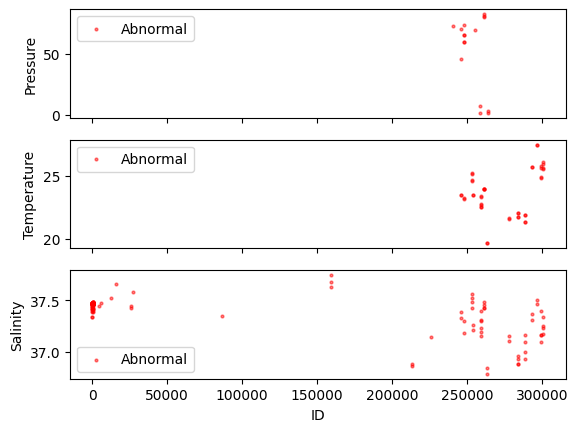

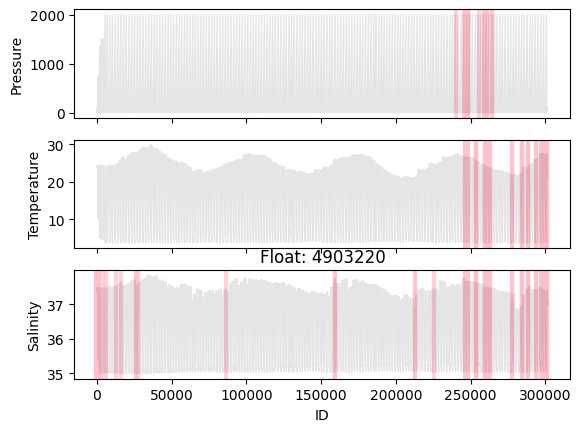

In [6]:
# Plot data in each dimension
# start = 105000
# end = start+5000
start = 0
end = len(data)

features = ['Pressure', 'Temperature', 'Salinity']

fig, axs = plt.subplots(len(features), 1, sharex=True)
for i, feature in enumerate(features): 
    plot_anomalies(data.iloc[start:end], x_axis = 'ID', y_axis = feature, label_name=f'Label_{feature}', ax=axs[i])

fig, axs = plt.subplots(len(features), 1, sharex=True)
for i, feature in enumerate(features): 
    plot_anomalies_lines(data.iloc[start:end], x_axis = 'ID', y_axis = feature, label_name=f'Label_{feature}', ax=axs[i])

# plt.savefig(f'results/argo_{float_number}.png', dpi=300, bbox_inches='tight')
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')
plt.title(f'Float: {float_number}')
plt.xlabel('ID')
plt.show()

### Plot one cycle of data

In [7]:
def get_groups_by_dates(group_df, chosen_dates):
    groups = []
    for date in chosen_dates: 
        # Filter data for the chosen date
        chosen_group = group_df.get_group(pd.to_datetime(date).date())
        sorted_group = chosen_group.sort_values(by='Pressure')
        groups.append(sorted_group)
    
    groups = pd.concat(groups, ignore_index=True)
    groups['New ID'] = [i for i in range(len(groups))]
    return groups


In [8]:
# Convert the 'DATE' column to datetime format
data['Date'] = pd.to_datetime(data['Datetime']).dt.date
data['Date'] = pd.to_datetime(data['Date'])


# Group the data based on the 'DATE' column and count the occurrences
grouped = data.groupby(data['Date'])

group_sizes = grouped.size()

# Create a list of tuples with date and group size
group_sizes_list = [(date, size) for date, size in zip(group_sizes.index, group_sizes.values)]

# Create a DataFrame from the list of tuples
group_sizes_df = pd.DataFrame(group_sizes_list, columns=['Date', 'Group Size'])

# Save the DataFrame to a CSV file
output_csv = f'results/group_sizes_{float_number}.csv'
group_sizes_df.to_csv(output_csv, index=True)

print(float_number)
print(group_sizes_df)


4903220
          Date  Group Size
0   2019-03-07         469
1   2019-03-08         717
2   2019-03-09        1037
3   2019-03-11        1123
4   2019-03-12        1131
..         ...         ...
162 2023-06-23        1811
163 2023-07-03        1889
164 2023-07-13        1855
165 2023-07-23        1889
166 2023-08-01        1891

[167 rows x 2 columns]


In [9]:
# Choose a specific date for plotting
chosen_dates = group_sizes_df['Date'][0:5].to_list() # Replace with the date you want to plot

groups = get_groups_by_dates(grouped, chosen_dates)
groups.tail()

,ID,Datetime,Latitude,Longitude,Pressure,Salinity,Temperature,Label,Label_Pressure,Label_Temperature,Label_Salinity,Date,New ID
4472,4104,2019-03-12T12:59:49Z,24.10992,-51.16404,1506.00,35.053,4.761,0,0,0,0,2019-03-12,4472
4473,4105,2019-03-12T12:59:49Z,24.10992,-51.16404,1507.96,35.053,4.759,0,0,0,0,2019-03-12,4473
4474,4106,2019-03-12T12:59:49Z,24.10992,-51.16404,1510.00,35.053,4.754,0,0,0,0,2019-03-12,4474
4475,4107,2019-03-12T12:59:49Z,24.10992,-51.16404,1512.04,35.054,4.747,0,0,0,0,2019-03-12,4475
4476,4108,2019-03-12T12:59:49Z,24.10992,-51.16404,1513.56,35.054,4.747,0,0,0,0,2019-03-12,4476


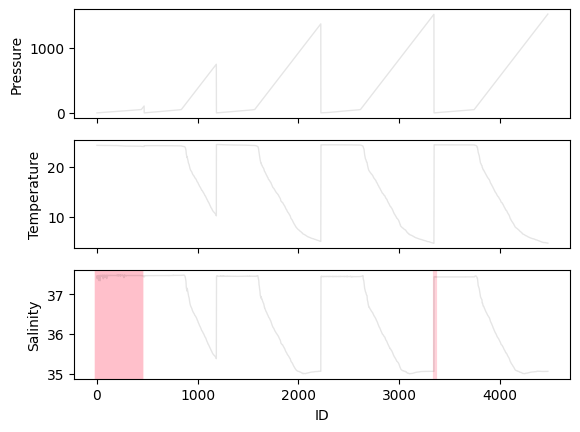

In [10]:
start = 0
end = ''
# features = ['Pressure', 'Temperature', 'Salinity']
features = ['Pressure', 'Temperature', 'Salinity']
                         
fig, axs = plt.subplots(len(features), 1, sharex=True)
# for i, feature in enumerate(features): 
#     ax = plot_anomalies_lines(groups, x_axis = 'ID', y_axis = feature, label_name='Label', ax=axs[i])

for i, feature in enumerate(features): 
    plot_anomalies_lines(groups, x_axis = 'New ID', y_axis = feature, label_name=f'Label_{feature}', ax=axs[i])

plt.xlabel('ID')
plt.show()

## Plot the profile heatmap

In [11]:
def plot_profile_image(heatmap_data, plot_labels=False): 
    # Create the heatmap
    plt.figure(figsize=(5, 2))

    # Draw the heatmap using Matplotlib's pcolormesh
    heatmap = plt.pcolormesh(heatmap_data.columns, heatmap_data.index, heatmap_data.values, cmap='coolwarm', shading='auto')

    # Add colorbar
    cbar = plt.colorbar(heatmap, label=feature_name)

    # Reverse the y-axis (pressure)
    plt.gca().invert_yaxis()


    # Plot anomaly labels
    if plot_labels: 
        label = 1
        label_data = profile_groups[profile_groups['Label'] == label]
        plt.scatter(label_data['Date'], label_data['Pressure'], label=label, color='none', edgecolor='black', marker='o', s=30, alpha=1, zorder=2, sharex=True)

    plt.xlabel('Date')
    plt.ylabel('Pressure')
    plt.xticks(rotation=45)
    # plt.title('Temperature Heatmap with Pressure and Date')
    return plt


In [12]:
group_sizes_df

,Date,Group Size
0,2019-03-07,469
1,2019-03-08,717
2,2019-03-09,1037
3,2019-03-11,1123
4,2019-03-12,1131
...,...,...
162,2023-06-23,1811
163,2023-07-03,1889
164,2023-07-13,1855
165,2023-07-23,1889


In [13]:
# Choose a specific date for plotting
chosen_dates = group_sizes_df['Date'].to_list() # Replace with the date you want to plot

profile_groups = get_groups_by_dates(grouped, chosen_dates)
profile_groups['Pressure'] = profile_groups['Pressure'].round(0)
profile_groups

,ID,Datetime,Latitude,Longitude,Pressure,Salinity,Temperature,Label,Label_Pressure,Label_Temperature,Label_Salinity,Date,New ID
0,1,2019-03-07T20:24:55Z,24.02813,-51.02361,0.0,37.419,24.238,0,0,0,0,2019-03-07,0
1,60,2019-03-07T20:24:55Z,24.02813,-51.02361,0.0,37.419,24.238,1,0,0,1,2019-03-07,1
2,61,2019-03-07T20:24:55Z,24.02813,-51.02361,1.0,37.466,24.238,1,0,0,1,2019-03-07,2
3,62,2019-03-07T20:24:55Z,24.02813,-51.02361,1.0,37.462,24.244,1,0,0,1,2019-03-07,3
4,63,2019-03-07T20:24:55Z,24.02813,-51.02361,1.0,37.467,24.244,1,0,0,1,2019-03-07,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301678,300799,2023-08-01T23:08:58Z,28.24216,-40.35315,2004.0,35.036,3.788,0,0,0,0,2023-08-01,301678
301679,300800,2023-08-01T23:08:58Z,28.24216,-40.35315,2006.0,35.036,3.785,0,0,0,0,2023-08-01,301679
301680,300801,2023-08-01T23:08:58Z,28.24216,-40.35315,2008.0,35.036,3.785,0,0,0,0,2023-08-01,301680
301681,300802,2023-08-01T23:08:58Z,28.24216,-40.35315,2010.0,35.036,3.783,0,0,0,0,2023-08-01,301681


4903220


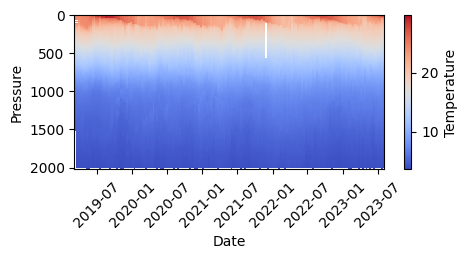

In [14]:
# Plot the profile heatmap
import seaborn as sns

feature_name = 'Temperature'
# feature_name = 'Salinity'

# Pivot the data for heatmap plotting
heatmap_data = profile_groups.pivot_table(feature_name, 'Pressure', 'Date')
print(float_number)
plt = plot_profile_image(heatmap_data, plot_labels=False)
plt.savefig(f'results/profile_{float_number}_{feature_name}.png', dpi = 300, bbox_inches='tight')
plt.show()

In [39]:
heatmap_data

DatetimeIndex(['2019-03-07', '2019-03-08', '2019-03-09', '2019-03-11',
               '2019-03-12', '2019-03-22', '2019-04-01', '2019-04-11',
               '2019-04-21', '2019-05-01',
               ...
               '2023-05-04', '2023-05-14', '2023-05-24', '2023-06-03',
               '2023-06-13', '2023-06-23', '2023-07-03', '2023-07-13',
               '2023-07-23', '2023-08-01'],
              dtype='datetime64[ns]', name='Date', length=167, freq=None)

In [33]:
N = 100
# Find columns with more than N null values
columns_with_nulls = heatmap_data.isnull().sum()  # Count nulls in each column
result = columns_with_nulls[columns_with_nulls > N]  # Filter for columns with more than N nulls
print(result)

Date
2019-03-07    992
2019-03-08    673
2019-03-09    364
2019-03-11    291
2019-03-12    289
2021-11-26    249
dtype: int64


<AxesSubplot: xlabel='Pressure'>

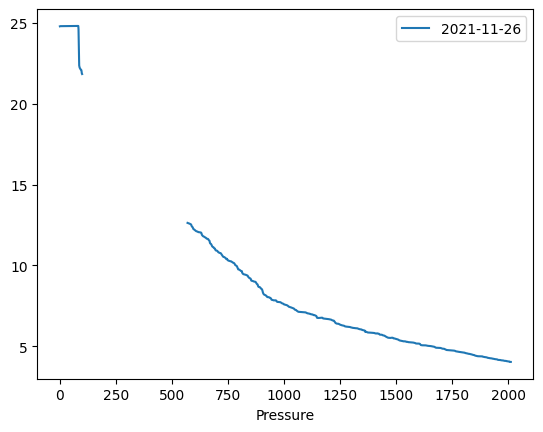

In [42]:
heatmap_data.plot(y='2021-11-26')

In [ ]:
missing_rate = heatmap_data.isnull().sum().sum()/heatmap_data.size*100
print(f'Missing rate: {missing_rate.round(2)}%')

Missing rate: 3.13%


## Fill in missing values using kNN

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# # Sample DataFrame with NaN values
# data = {
#     'feature1': [1.0, 2.0, 3.0, 4.0, None, 6.0, 7.0, 8.0, 9.0, 10.0],
#     'feature2': [10.0, None, None, None, None, None, None, 80.0, 90.0, 100.0]
# }

# df = pd.DataFrame(data)

# Initialize the KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)  # You can adjust n_neighbors as needed

# Fill in NaN values using KNN imputation
imputed_data = knn_imputer.fit_transform(heatmap_data)

# Convert the imputed data array back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=heatmap_data.columns)

AttributeError: PathCollection.set() got an unexpected keyword argument 'sharex'

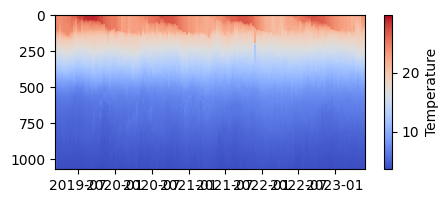

In [ ]:
# plot_profile_image(heatmap_data, plot_labels=True)

plot_profile_image(imputed_df, plot_labels=True)

In [ ]:
imputed_df

Date,2019-03-07,2019-03-08,2019-03-09,2019-03-11,2019-03-12,2019-03-22,2019-04-01,2019-04-11,2019-04-21,2019-05-01,...,2023-02-24,2023-03-06,2023-03-16,2023-03-26,2023-04-05,2023-04-15,2023-04-25,2023-05-04,2023-05-14,2023-05-24
0,37.419000,37.467792,37.453347,37.446567,37.436384,37.473000,37.429385,37.508421,37.491393,37.505852,...,37.342696,37.298000,37.285330,36.943848,37.102369,36.862000,36.841991,36.898519,37.202963,37.204505
1,37.442625,37.467750,37.453500,37.446750,37.438250,37.472750,37.429600,37.519000,37.491375,37.505667,...,37.347889,37.296857,37.285700,36.943444,37.103000,36.862000,36.842222,36.899778,37.201444,37.207875
2,37.456125,37.467875,37.453556,37.445400,37.435125,37.472000,37.429667,37.511444,37.491000,37.506000,...,37.343818,37.296375,37.284600,36.944000,37.102625,36.862333,36.842571,36.899625,37.204333,37.202375
3,37.446250,37.467875,37.453667,37.446182,37.435125,37.472778,37.429333,37.510375,37.491375,37.505889,...,37.342300,37.296875,37.285091,36.944000,37.101857,36.862125,36.842250,36.899000,37.201444,37.203750
4,37.444778,37.467750,37.452875,37.446769,37.435778,37.472250,37.429222,37.495889,37.491429,37.506000,...,37.337900,37.296375,37.285200,36.944100,37.102250,36.861889,36.841500,36.896778,37.206000,37.201889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,37.446000,35.429333,35.006000,34.998000,35.004667,35.015000,35.017333,35.022333,35.013333,35.022000,...,35.037667,35.037000,35.030000,35.021333,35.031333,35.023000,35.027333,35.025333,35.024000,35.037333
1067,37.437333,35.383667,35.054000,35.054000,35.053667,35.015000,35.017333,35.022333,35.013333,35.022000,...,35.037667,35.037000,35.030000,35.021333,35.031333,35.023000,35.027333,35.025000,35.024000,35.037333
1068,37.462292,35.383667,35.018333,35.017333,35.016333,35.015000,35.017333,35.022333,35.013333,35.022000,...,35.037667,35.037333,35.030000,35.021333,35.031333,35.023000,35.027333,35.025000,35.024333,35.037333
1069,37.437333,35.383667,35.054667,35.054000,35.053667,35.015000,35.017333,35.022333,35.013333,35.022000,...,35.037667,35.037000,35.030000,35.021333,35.031333,35.023000,35.027333,35.025000,35.024000,35.037333
